In [1]:
##### Import all necessity functions for Machine Learning #####
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
import zipfile
import cv2
import os
import re
import nltk
import random
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
from functools import reduce
from itertools import chain
from wordcloud import WordCloud
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

##### Download keras #####
!pip install keras

##### Remove all warnings #####
import warnings
warnings.filterwarnings("ignore")

##### Import all necessity functions for Neural Network #####
import tensorflow as tf
from keras.models import Sequential, Model
from keras.utils import plot_model
from keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU,  Embedding
from keras.activations import tanh, relu, sigmoid, softmax, swish
from keras.regularizers import L1, L2, L1L2
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber, BinaryCrossentropy
import keras.utils as image
from google.colab.patches import cv2_imshow
from keras.utils import plot_model

##### Plotting the confusion matrix #####
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

###### NLP Libraries ######

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

###### Download functions for nltk ######

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#####Import the dataset

In [2]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#####Convert this target class into Numerical

In [3]:
df.loc[:, 'Species'] = df.loc[:, 'Species'].\
      map({value: index for index, value\
      in enumerate(df.loc[:, 'Species'].value_counts().index)})

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


#####Scaling the dataset

In [4]:
StandardScaler = StandardScaler()
independent = StandardScaler.fit_transform(df.iloc[:, :-1].values)
independent = pd.DataFrame(independent, columns = df.columns[:-1])
df = pd.concat([independent, df.iloc[:, -1]], axis = 1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977,0


#####Drop the Id column

In [5]:
try:
  df.drop(['Id'], axis = 1, inplace = True)
except Exception as e:
  print(e.with_traceback)
else:
  print("Id column is deleted !!!")

Id column is deleted !!!


#####Split the dataset with train and test

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print("The shape of X_train is # {} ".format(X_train.shape),'\n')
print("The shape of X_test  is # {} ".format(X_test .shape),'\n')
print("The shape of y_train is # {} ".format(y_train.shape),'\n')
print("The shape of y_test  is # {} ".format(y_test.shape))

The shape of X_train is # (112, 4)  

The shape of X_test  is # (38, 4)  

The shape of y_train is # (112,)  

The shape of y_test  is # (38,) 


#####Initiate the DataLoader with batch_size :: 16

In [7]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader

""""Convert X_train and X_test into torch Float"""
X_train = torch.tensor(data = X_train, dtype = torch.float32)
X_test  = torch.tensor(data = X_test, dtype = torch.float32)

"""Initiate the DataLoader"""
loader = DataLoader(dataset = list(zip(X_train, y_train)), batch_size = 32, shuffle = True)
print("The batch size of this loader # {} ".format(loader.batch_size))

The batch size of this loader # 32 


In [8]:
data, labels = next(iter(loader))
print("The shape of singular batch size of training data # {} ".format(data.shape))
print("The shape of singular batch size of label data # {} ".format(labels.shape))

The shape of singular batch size of training data # torch.Size([32, 4]) 
The shape of singular batch size of label data # torch.Size([32]) 


#####Model Building

In [9]:
"""Create a class named IrisClassifier which will inherit the parent class of NN of PyTorch"""
class IrisClassifier(nn.Module):
  """
  Create a constructor that will take TWO parameters
  1. input_dimension
  2. output_dimension(Softmax)
  """
  def __init__(self, input_dimension, output_dimension):
    """Call the super() class of NN of PyTorch"""
    super().__init__()
    """
    Create the First Hidden Layer & Activation(ReLU) Function
    1. input_features = input_dimension
    2. output_features = 32
    3. Activation Layer(RELU)
    """
    self.hiddenLayer_1 = nn.Linear(in_features = input_dimension, out_features = 32)
    """
    Create the BatchNormalization() in this first Hidden Layer
    """
    self.batchNormalization_1 = nn.BatchNorm1d(num_features = 32)
    self.activation_1 = nn.ReLU()

    """
    Create the Second Hidden Layer & Activation(ReLU) Function
    1. input_features = 32
    2. output_features = 16
    3. Activation Layer(ReLU)
    """
    self.hiddenLayer_2 = nn.Linear(in_features = 32, out_features = 16)
    """
    Create the BatchNormalization() in this second Hidden Layer
    """
    self.batchNormalization_2 = nn.BatchNorm1d(num_features = 16)
    self.activation_2 = nn.ReLU()

    """
    Create the output layer & Activation Function
    1. input_features = 16
    2. output_features = output_dimension
    3. Activation Layer(ReLU)
    """
    self.outputLayer = nn.Linear(in_features = 16, out_features = output_dimension)
    self.activation  = nn.Softmax()

  def forward(self, x):
    x = self.hiddenLayer_1(x)
    x = self.activation_1(self.batchNormalization_1(x))

    x = self.hiddenLayer_2(x)
    x = self.activation_2(self.batchNormalization_2(x))

    x = self.activation(self.outputLayer(x))

    return x

In [10]:
### Call the IrisClassifer Class
model = IrisClassifier(input_dimension = X.shape[1], output_dimension = len(np.unique(y)))
print(model.parameters)

<bound method Module.parameters of IrisClassifier(
  (hiddenLayer_1): Linear(in_features=4, out_features=32, bias=True)
  (batchNormalization_1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation_1): ReLU()
  (hiddenLayer_2): Linear(in_features=32, out_features=16, bias=True)
  (batchNormalization_2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation_2): ReLU()
  (outputLayer): Linear(in_features=16, out_features=3, bias=True)
  (activation): Softmax(dim=None)
)>


In [11]:
# summary(model = model, input_size = X.shape)

In [12]:
for parameter in model.parameters():
  print(parameter)
  print("*"*100)

Parameter containing:
tensor([[-0.1746,  0.4499, -0.1245,  0.1154],
        [ 0.3999,  0.2179, -0.1090, -0.4217],
        [-0.3427,  0.3750,  0.2589,  0.4299],
        [ 0.1234,  0.2708, -0.4817, -0.4609],
        [ 0.3809,  0.3945,  0.2150, -0.3135],
        [ 0.3171, -0.0074, -0.1290, -0.0157],
        [ 0.4779, -0.3449,  0.2740, -0.2436],
        [ 0.4691, -0.3562,  0.1805,  0.4622],
        [-0.0365,  0.3115, -0.0461,  0.4582],
        [ 0.3994,  0.3371,  0.3388, -0.2457],
        [-0.2646,  0.3288, -0.2803,  0.1483],
        [ 0.3018, -0.3434,  0.2187, -0.3623],
        [-0.2773,  0.3769,  0.4523,  0.1417],
        [-0.1097,  0.1726, -0.1974, -0.1800],
        [-0.4712, -0.0312, -0.4095,  0.4839],
        [-0.2258, -0.2531,  0.4244,  0.4014],
        [ 0.4558, -0.3384, -0.2308, -0.0132],
        [-0.4123,  0.2204,  0.1400, -0.4672],
        [ 0.1375,  0.1286,  0.0818, -0.4231],
        [ 0.2878, -0.0473,  0.4564,  0.1339],
        [ 0.2289, -0.3705,  0.1031,  0.3591],
        [ 0.

In [13]:
test_loader = DataLoader(dataset = list(zip(X_test, y_test)), batch_size = 32, shuffle = True)
print("The batch size of test # {} ".format(test_loader.batch_size))

The batch size of test # 32 


#####Initialize the loss & Optimizer

In [14]:
LEARNING_RATE = 0.01
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(params = model.parameters(), lr = LEARNING_RATE)

#####Trainig the dataset with the model

In [15]:
"""Initialize some of the varibales"""
EPOCHS = 20
TRAIN_LOSS = []
VAL_LOSS = []
TRAIN_ACCURACY = []
VAL_ACCURACY = []

model.train()

""""Run a loop with the defined EPOCHS"""
for epoch in range(EPOCHS):
  """
  Initialize the train and test loss LIST
  Extract the data(X_batch), label(y_batch) from the loader
  """
  train_loss = []
  test_loss  = []
  for (X_batch, y_batch) in loader:
    """
    Pass the training data(X_batch) to the model and do the prediction
    """
    prediction = model(X_batch)
    """Compute the loss function of training"""
    loss = loss_function(prediction, y_batch)
    """Append this train loss to the train_loss list"""
    train_loss.append(loss.item())
    """
    1. Initialize the Gradient of optimizer
    2. Do the backward() propagation
    3. Do the step
    """
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  """***************************************************************************************"""
  """***************************************************************************************"""

  """
  Storing the Train loss and accuracy
  """
  TRAIN_LOSS.append(loss.item())
  TRAIN_ACCURACY.append(accuracy_score(torch.argmax(prediction, dim = 1), y_batch))

  """***************************************************************************************"""
  """***************************************************************************************"""

  """
  For validation
  """
  for (val_batch, val_label) in test_loader:
    validation_prediction = model(val_batch)
    validation_loss = loss_function(validation_prediction, val_label)
    test_loss.append(validation_loss.item())

  """***************************************************************************************"""
  """***************************************************************************************"""

  VAL_LOSS.append(validation_loss.item())
  VAL_ACCURACY.append(accuracy_score(torch.argmax(validation_prediction, dim = 1), val_label))

  """***************************************************************************************"""
  """***************************************************************************************"""
  """
  Display:
  1. Train loss
  2. Train accuracy
  3. Validation loss
  4. Validation accuracy
  """
  print("Epoch {}/{}".format(epoch + 1, EPOCHS))
  print("{}/{} [===============================] - loss: {} - accuracy: {} - val_loss: {} - val_accuracy: {} ".\
        format(test_loader.batch_size,\
               test_loader.batch_size,\
               np.round(np.array(train_loss).mean(), 4),\
               np.round(accuracy_score(torch.argmax(prediction, dim = 1), y_batch), 4),\
               np.round(np.array(test_loss).mean(),  4),\
               np.round(accuracy_score(torch.argmax(validation_prediction, dim = 1), val_label), 4)
        ))

Epoch 1/20
32/32 [===============================] - loss: 1.021 - accuracy: 0.8125 - val_loss: 0.8999 - val_accuracy: 1.0 
Epoch 2/20
32/32 [===============================] - loss: 0.8726 - accuracy: 0.9375 - val_loss: 0.814 - val_accuracy: 0.8333 
Epoch 3/20
32/32 [===============================] - loss: 0.7722 - accuracy: 0.8125 - val_loss: 0.7184 - val_accuracy: 1.0 
Epoch 4/20
32/32 [===============================] - loss: 0.7141 - accuracy: 0.9375 - val_loss: 0.8115 - val_accuracy: 0.5 
Epoch 5/20
32/32 [===============================] - loss: 0.6782 - accuracy: 1.0 - val_loss: 0.8769 - val_accuracy: 0.3333 
Epoch 6/20
32/32 [===============================] - loss: 0.6347 - accuracy: 0.9375 - val_loss: 0.703 - val_accuracy: 0.6667 
Epoch 7/20
32/32 [===============================] - loss: 0.6786 - accuracy: 0.75 - val_loss: 0.6175 - val_accuracy: 1.0 
Epoch 8/20
32/32 [===============================] - loss: 0.6191 - accuracy: 1.0 - val_loss: 0.6369 - val_accuracy: 0.8333 

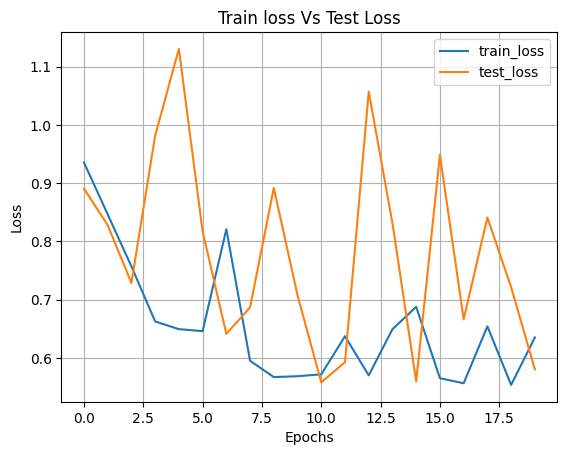

In [16]:
plt.title('Train loss Vs Test Loss')
plt.plot(np.array(TRAIN_LOSS), label = 'train_loss')
plt.plot(np.array(VAL_LOSS), label = 'test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

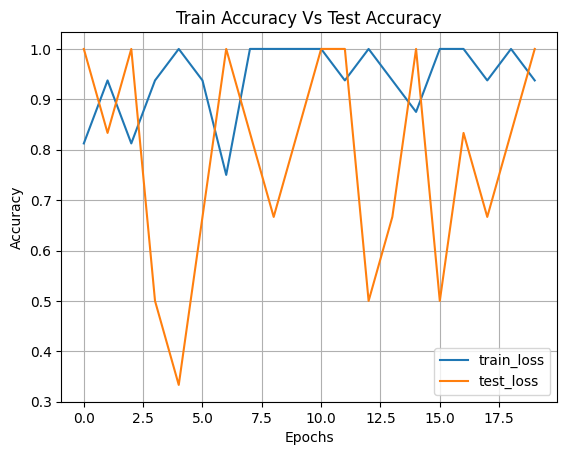

In [17]:
plt.title('Train Accuracy Vs Test Accuracy')
plt.plot(np.array(TRAIN_ACCURACY), label = 'train_loss')
plt.plot(np.array(VAL_ACCURACY), label = 'test_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#####Evaluation the model

In [18]:
predicted = model(X_train)
predicted = torch.argmax(predicted, dim = 1)

print("ACCURACY  # {} ".format(accuracy_score(predicted, y_train)),'\n')
print("PRECISION # {} ".format(precision_score(predicted, y_train, average = "macro")),'\n')
print("RECALL    # {} ".format(recall_score(predicted, y_train, average = "macro")),'\n')
print("F1_SCORE  # {} ".format(f1_score(predicted, y_train, average = "macro")))

ACCURACY  # 0.9732142857142857  

PRECISION # 0.9739091318038686  

RECALL    # 0.9743243243243244  

F1_SCORE  # 0.9740084388185654 


In [19]:
predicted = model(X_test)
predicted = torch.argmax(predicted, dim = 1)

print("ACCURACY  # {} ".format(accuracy_score(predicted, y_test)),'\n')
print("PRECISION # {} ".format(precision_score(predicted, y_test, average = "macro")),'\n')
print("RECALL    # {} ".format(recall_score(predicted, y_test, average = "macro")),'\n')
print("F1_SCORE  # {} ".format(f1_score(predicted, y_test, average = "macro")))

ACCURACY  # 1.0  

PRECISION # 1.0  

RECALL    # 1.0  

F1_SCORE  # 1.0 
